<a href="https://colab.research.google.com/github/tomashobza/tuw_mach_learn/blob/main/02_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive
from scipy.io import arff
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os

In [7]:
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/machine_learning')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
def save_as_parquet(df, dir, filename):
  df.to_parquet(
      os.path.join(dir, 'cleaned', filename),
      index=True
  )

# Loan Dataset

In [ ]:
data_dir_loan = os.path.join(os.getcwd(), 'data', 'loan_dataset')
df_loan_train = pd.read_csv(os.path.join(data_dir_loan, "loan-10k.lrn.csv"))
df_loan_test = pd.read_csv(os.path.join(data_dir_loan, "loan-10k.tes.csv"))

print(df_loan_train.shape)
print(df_loan_test.shape)

(10000, 92)
(10000, 91)


In [ ]:
pd.set_option('display.max_rows', 92)
df_loan_train.convert_dtypes().dtypes['policy_code']

Int64Dtype()

In [ ]:
def preprocess_loan(df: pd.DataFrame):
    df = df.copy()
    df = df.convert_dtypes()

    # === NUMERIC ===
    df['term'] = df['term'].str.removesuffix(' months').astype('Int64')

    # === ORDINAL ===
    ordinal_configs = {
        'emp_length': {
            'categories': ['< 1 year', '1 year', '2 years', '3 years', '4 years',
                    '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years'],
            'ordered': True
        },
        'grade': {
            'categories': ['A', 'B', 'C', 'D', 'E', 'F', 'G'],
            'ordered': True
        }
    }

    for col, config in ordinal_configs.items():
        if col in df.columns:
            df[col] = pd.Categorical(df[col], **config)

    # === NOMINAL ===
    # Columns already processed
    processed = ['term'] + list(ordinal_configs.keys())

    # Convert remaining string columns to unordered categories
    nominal_cols = df.select_dtypes(include="string").columns
    for col in nominal_cols:
        if col not in processed:
            df[col] = df[col].astype('category')

    # Specific nominal columns
    if 'policy_code' in df.columns:
        df['policy_code'] = df['policy_code'].astype('category')

    df = df.set_index('ID')

    return df

In [ ]:
loan_train_cleaned = preprocess_loan(df_loan_train)
loan_test_cleaned = preprocess_loan(df_loan_test)

In [ ]:
def check_missing(df):
    """Comprehensive missing value report"""
    missing = pd.DataFrame({
        'column': df.columns,
        'dtype': df.dtypes,
        'missing_count': df.isna().sum().values,
        'missing_pct': (df.isna().sum().values / len(df) * 100).round(2)
    })

    missing = missing[missing['missing_count'] > 0].sort_values('missing_count', ascending=False)

    return missing


print(check_missing(loan_train_cleaned))
print(check_missing(loan_test_cleaned))

Empty DataFrame
Columns: [column, dtype, missing_count, missing_pct]
Index: []
Empty DataFrame
Columns: [column, dtype, missing_count, missing_pct]
Index: []


In [ ]:


save_as_parquet(loan_train_cleaned, data_dir_loan, 'loan_train_cleaned.parquet')
save_as_parquet(loan_test_cleaned, data_dir_loan, 'loan_test_cleaned.parquet')



# Breast Cancer

In [ ]:
import pandas as pd
import os

data_dir_br = os.path.join(os.getcwd(), 'data', 'breast_cancer')
df_br_train = pd.read_csv(os.path.join(data_dir_br, "breast-cancer-diagnostic.shuf.lrn.csv"))
df_br_test = pd.read_csv(os.path.join(data_dir_br, "breast-cancer-diagnostic.shuf.tes.csv"))
print(df_br_train.shape)
print(df_br_test.shape)

(285, 32)
(284, 31)


In [ ]:
def preprocess_br(df: pd.DataFrame):

    df = df.copy()
    df = df.set_index('ID')

    return df

In [ ]:
br_train_cleaned = preprocess_br(df_br_train)
br_test_cleaned = preprocess_br(df_br_test)

In [ ]:
br_train_cleaned.head()

,class,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,concavePointsMean,symmetryMean,...,radiusWorst,textureWorst,perimeterWorst,areaWorst,smoothnessWorst,compactnessWorst,concavityWorst,concavePointsWorst,symmetryWorst,fractalDimensionWorst
ID,,,,,,,,,,,,,,,,,,,,,
8813129,False,13.27,17.02,84.55,546.4,0.08445,0.04994,0.03554,0.024560,0.1496,...,15.14,23.60,98.84,708.8,0.1276,0.1311,0.17860,0.09678,0.2506,0.07623
898678,False,12.06,18.90,76.66,445.3,0.08386,0.05794,0.00751,0.008488,0.1555,...,13.64,27.06,86.54,562.6,0.1289,0.1352,0.04506,0.05093,0.2880,0.08083
917896,False,13.71,18.68,88.73,571.0,0.09916,0.10700,0.05385,0.037830,0.1714,...,15.11,25.63,99.43,701.9,0.1425,0.2566,0.19350,0.12840,0.2849,0.09031
869691,True,11.80,16.58,78.99,432.0,0.10910,0.17000,0.16590,0.074150,0.2678,...,13.74,26.38,91.93,591.7,0.1385,0.4092,0.45040,0.18650,0.5774,0.10300
9110127,True,18.03,16.85,117.50,990.0,0.08947,0.12320,0.10900,0.062540,0.1720,...,20.38,22.02,133.30,1292.0,0.1263,0.2666,0.42900,0.15350,0.2842,0.08225


In [ ]:
save_as_parquet(br_train_cleaned, data_dir_br, 'br_train_cleaned.parquet')
save_as_parquet(br_test_cleaned, data_dir_br, 'br_test_cleaned.parquet')

# OZONE dataset

Num of NaN values: 0
   WSR0  WSR1  WSR2  WSR3  WSR4  WSR5  WSR6  WSR7  WSR8  WSR9  ...      RH50  \
0   0.8   1.8   2.4   2.1   2.0   2.1   1.5   1.7   1.9   2.3  ...  0.150000   
1   2.8   3.2   3.3   2.7   3.3   3.2   2.9   2.8   3.1   3.4  ...  0.480000   
2   2.9   2.8   2.6   2.1   2.2   2.5   2.5   2.7   2.2   2.5  ...  0.600000   
3   4.7   3.8   3.7   3.8   2.9   3.1   2.8   2.5   2.4   3.1  ...  0.490000   
4   2.6   2.1   1.6   1.4   0.9   1.5   1.2   1.4   1.3   1.4  ...  0.304716   

         U50        V50         HT50         KI         TT           SLP  \
0  10.670000  -1.560000  5795.000000 -12.100000  17.900000  10330.000000   
1   8.390000   3.840000  5805.000000  14.050000  29.000000  10275.000000   
2   6.940000   9.800000  5790.000000  17.900000  41.300000  10235.000000   
3   8.730000  10.540000  5775.000000  31.150000  51.700000  10195.000000   
4   9.872418   0.830116  5818.821222  10.511051  37.388335  10164.198442   

        SLP_  Precp  isOzoneDay  
0 -55.0

<Axes: ylabel='Frequency'>

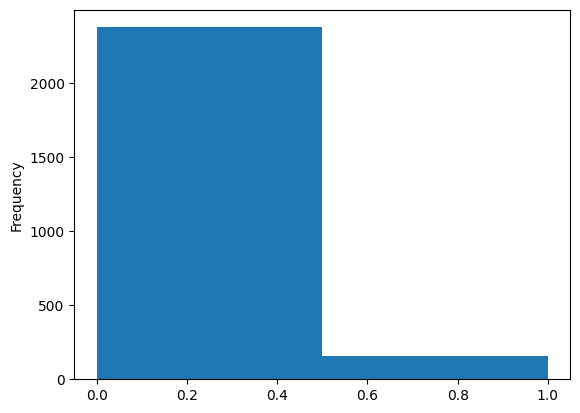

In [ ]:
data_dir_oz = os.path.join(os.getcwd(), 'data', 'ozone')
data_path = os.path.join(data_dir_oz, 'phpdReP6S.arff')
names_path = os.path.join(data_dir_oz, 'eighthr.names')

# get column names
with open(names_path, 'r') as f:
    lines = [line.strip() for line in f if line.strip()]
columns = [line.split(':')[0].strip() for line in lines]
columns = columns[2:]
columns.append('isOzoneDay')

data, meta = arff.loadarff(data_path)
df_ozone = pd.DataFrame(data)
df_ozone.columns = columns

df_ozone['isOzoneDay'] = df_ozone['isOzoneDay'].apply(lambda x: x.decode() if isinstance(x, bytes) else x)
df_ozone['isOzoneDay'] = df_ozone['isOzoneDay'].astype(int)
df_ozone['isOzoneDay'] = df_ozone['isOzoneDay'].replace({2: 1, 1: 0})


print(f"Num of NaN values: {df_ozone.isna().sum().sum()}")
print(df_ozone.head())
df_ozone['isOzoneDay'].plot.hist(bins=2)

In [ ]:
save_as_parquet(df_ozone, os.path.join(data_dir_oz), 'ozone_cleaned.parquet')

# Seattle Crime Dataset

## 0. Load the Dataset

In [8]:
data_dir_seattle_crime = os.path.join(os.getcwd(), 'data', 'seattle_crime')
df_seattle_crime_path = os.path.join(data_dir_seattle_crime, "Seattle_Crime_Data_06-23-2019-4.arff")

# Load the ARFF file
data, meta = arff.loadarff(df_seattle_crime_path)

# Convert to a pandas DataFrame
df = pd.DataFrame(data)

# Decode byte strings (ARFF stores nominal/string attributes as bytes)
for col in df.select_dtypes([object]):
    df[col] = df[col].str.decode('utf-8')

In [9]:
print(df.head())
print(df.shape)

   Report_Number  Occurred_Time  Reported_Time     Crime_Subcategory  \
0   1.975000e+12          900.0         1500.0  BURGLARY-RESIDENTIAL   
1   1.976000e+12            1.0         2359.0     SEX OFFENSE-OTHER   
2   1.979000e+12         1600.0         1430.0             CAR PROWL   
3   1.981000e+13         2029.0         2030.0              HOMICIDE   
4   1.981000e+12         2000.0          435.0  BURGLARY-RESIDENTIAL   

    Primary_Offense_Description   Precinct Sector Beat  \
0            BURGLARY-FORCE-RES      SOUTH      R   R3   
1     SEXOFF-INDECENT LIBERTIES    UNKNOWN      ?    ?   
2                THEFT-CARPROWL       EAST      G   G2   
3  HOMICIDE-PREMEDITATED-WEAPON      SOUTH      S   S2   
4            BURGLARY-FORCE-RES  SOUTHWEST      W   W3   

                     Neighborhood  
0            LAKEWOOD/SEWARD PARK  
1                         UNKNOWN  
2        CENTRAL AREA/SQUIRE PARK  
3                 BRIGHTON/DUNLAP  
4  ROXHILL/WESTWOOD/ARBOR HEIGHTS  
(5

## 1. Preprocessing

In [11]:
def preprocess_crime(df):
  new_df = df.copy()

  # == 1. handle missing values ==
  # unify unknown values into NAs
  new_df = new_df.replace(['UNKNOWN', '?', 'Unknown', 'unknown'], pd.NA)
  print(new_df.isnull().sum()[new_df.isnull().sum() > 0])
  # drop rows with missing Occurred_Time or Reported_Time
  new_df = new_df.dropna(subset=['Occurred_Time', 'Reported_Time'])
  # for missing values in other columns, we can substitute them as a unified "UNKNOWN" category.
  new_df = new_df.fillna('UNKNOWN')
  print("Number of NAs:", new_df.isnull().sum()[new_df.isnull().sum() > 0])

  # == 2. drop the UID column Report_Number ==
  new_df = new_df.drop(columns=['Report_Number'])

  # == 3. drop Crime_Subcategory to prevent leakage ==
  new_df = new_df.drop(columns=["Crime_Subcategory"])

  # == 4. split occurred_time and reported_time into hour and minute and
  # sin/cos tranform them to keep the relationship that 00:00 comes after 23:59 ==
  # split "Reported_Time" into "reported_hour" and "reported_minute"
  new_df["reported_hour"] = new_df["Reported_Time"].apply(lambda x: int(x/100) if not pd.isna(x) else pd.NA)
  new_df["reported_minute"] = new_df["Reported_Time"].apply(lambda x: x % 100 if not pd.isna(x) else pd.NA)
  # make hours and minutes integers
  new_df["reported_hour"] = new_df["reported_hour"].astype("Int64")
  new_df["reported_minute"] = new_df["reported_minute"].astype("Int64")
  # cyclical encoding (sin/cos)
  new_df["reported_hour_sin"] = np.sin(2 * np.pi * new_df["reported_hour"] / 24)
  new_df["reported_hour_cos"] = np.cos(2 * np.pi * new_df["reported_hour"] / 24)
  new_df["reported_minute_sin"] = np.sin(2 * np.pi * new_df["reported_minute"] / 60)
  new_df["reported_minute_cos"] = np.cos(2 * np.pi * new_df["reported_minute"] / 60)

  # split "Occurred_Time" into "occured_hour" and "occured_minute"
  new_df["occured_hour"] = new_df["Occurred_Time"].apply(lambda x: int(x/100) if not pd.isna(x) else pd.NA)
  new_df["occured_minute"] = new_df["Occurred_Time"].apply(lambda x: x % 100 if not pd.isna(x) else pd.NA)
  # make hours and minutes integers
  new_df["occured_hour"] = new_df["occured_hour"].astype("Int64")
  new_df["occured_minute"] = new_df["occured_minute"].astype("Int64")
  # cyclical encoding (sin/cos)
  new_df["occured_hour_sin"] = np.sin(2 * np.pi * new_df["occured_hour"] / 24)
  new_df["occured_hour_cos"] = np.cos(2 * np.pi * new_df["occured_hour"] / 24)
  new_df["occured_minute_sin"] = np.sin(2 * np.pi * new_df["occured_minute"] / 60)
  new_df["occured_minute_cos"] = np.cos(2 * np.pi * new_df["occured_minute"] / 60)

  # drop Reported_Time, Occurred_Time, reported_hour, reported_minute, occured_hour, occured_minute
  new_df = new_df.drop(columns=["Reported_Time", "Occurred_Time", "reported_hour", "reported_minute", "occured_hour", "occured_minute"])

  # == 5. handle class imbalance ==
  # check class distribution
  class_counts = new_df['Primary_Offense_Description'].value_counts()
  print("Original target class distribution: ", class_counts)
  RARITY_THRESHOLD = 1000
  rare_classes = class_counts[class_counts < RARITY_THRESHOLD].index
  print(f"Number of rare classes (less than {RARITY_THRESHOLD} instances): {len(rare_classes)}")
  new_df['Primary_Offense_Description'] = new_df['Primary_Offense_Description'].apply(lambda x: 'OTHER' if x in rare_classes else x)
  print("New target class distribution: ", new_df['Primary_Offense_Description'].value_counts())

  # == 6. split the data into training and testing ==
  X = new_df.drop(columns=['Primary_Offense_Description'])
  y = new_df['Primary_Offense_Description']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
  print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

  # == 7. one-hot encode nominal features ==
  # encode separately
  X_train = pd.get_dummies(X_train, columns=['Precinct', 'Sector', 'Beat', 'Neighborhood'])
  X_test = pd.get_dummies(X_test, columns=['Precinct', 'Sector', 'Beat', 'Neighborhood'])
  # align (ensures same columns)
  X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

  return X_train, X_test, y_train, y_test


In [14]:
X_train, X_test, y_train, y_test = preprocess_crime(df)

Occurred_Time           2
Reported_Time           2
Crime_Subcategory     262
Precinct             3352
Sector               3346
Beat                 3298
Neighborhood         3366
dtype: int64
Number of NAs: Series([], dtype: int64)
Original target class distribution:  Primary_Offense_Description
THEFT-CARPROWL                   131297
THEFT-SHOPLIFT                    48637
THEFT-OTH                         47275
VEH-THEFT-AUTO                    37840
BURGLARY-FORCE-RES                27984
                                  ...  
HOMICIDE-NEG-MANS-GUN                 1
NARC-SMUGGLE-HEROIN                   1
NARC-SELL-BARBITUATE                  1
NARC-MANUFACTURE-HALLUCINOGEN         1
HOMICIDE-NEG-MANS-WEAPON              1
Name: count, Length: 144, dtype: int64
Number of rare classes (less than 1000 instances): 97
New target class distribution:  Primary_Offense_Description
THEFT-CARPROWL                    131297
THEFT-SHOPLIFT                     48637
THEFT-OTH                

## 2. Save the processed data

In [20]:
save_as_parquet(X_train, data_dir_seattle_crime, 'X_train.parquet')
save_as_parquet(X_test, data_dir_seattle_crime, 'X_test.parquet')
save_as_parquet(y_train.to_frame('Primary_Offense_Description'), data_dir_seattle_crime, 'y_train.parquet')
save_as_parquet(y_test.to_frame('Primary_Offense_Description'), data_dir_seattle_crime, 'y_test.parquet')